## IRIS FLOWER CLASSIFICATION ML PROJECT
## LEVEL - Intermediate LEVEL
### Data set- Iris Data set
### Bhaskar Sahu

## Importing Important Libraries and Supress Warning

In [201]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading the Data Set

In [202]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking the length of Data set 

In [203]:
data.shape

(150, 6)

##### The Data set consists of 150 Rows and 6 Columns

## Checking the Details of Data set

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Analysing the Numerical Columns Of the Data set

In [205]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Drop ID Column as It is not Needful to us

In [206]:
data.drop(["Id"], axis=1,inplace=True)

In [207]:
data.head(12)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Checking Correlation Betweeen the Variables Using HEATMAP

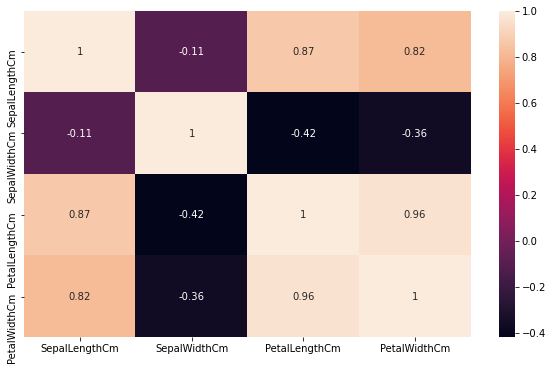

In [208]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),annot = True,cmap=None);

## Visualization using pairplot

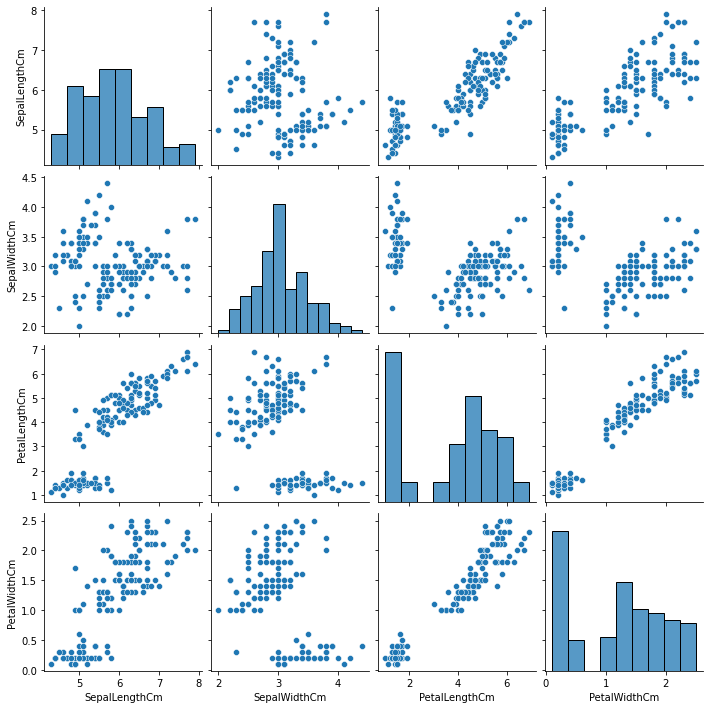

In [209]:
sns.pairplot(data  = data);

## Box Plot Visualization of Features Vs Species

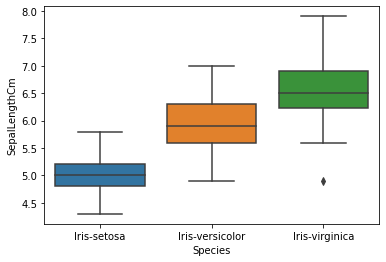

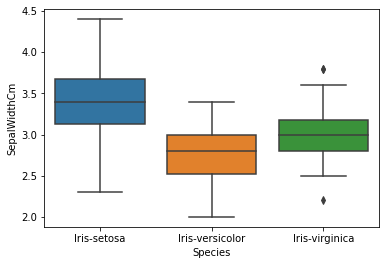

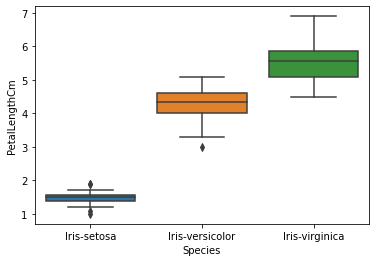

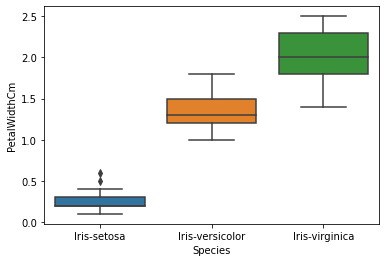

In [210]:
for col in data.columns:
    if data[col].dtypes != "object":
        sns.boxplot(data['Species'],data[col]) 
        plt.show()

## Putting Feature Variable into X and y

In [211]:
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = data["Species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Train,Test Split

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40)
X_train.shape, X_test.shape

((105, 4), (45, 4))

## Fitting the decision tree with default hyperparameters, apart from max_depth which is 4 so that we can plot and read the tree.

In [213]:
from sklearn.tree import DecisionTreeClassifier
dt  = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [214]:
!pip install six

## Importing Required Package for Graphviz Visualization

In [215]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [216]:
#Putting the Feature Names and Class Names into Given Variables
FN = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
CN = ["Iris-setosa","Iris-versicolor","Iris-virginca"]

## Visualize the Decision Tree Classifier algorithm graph

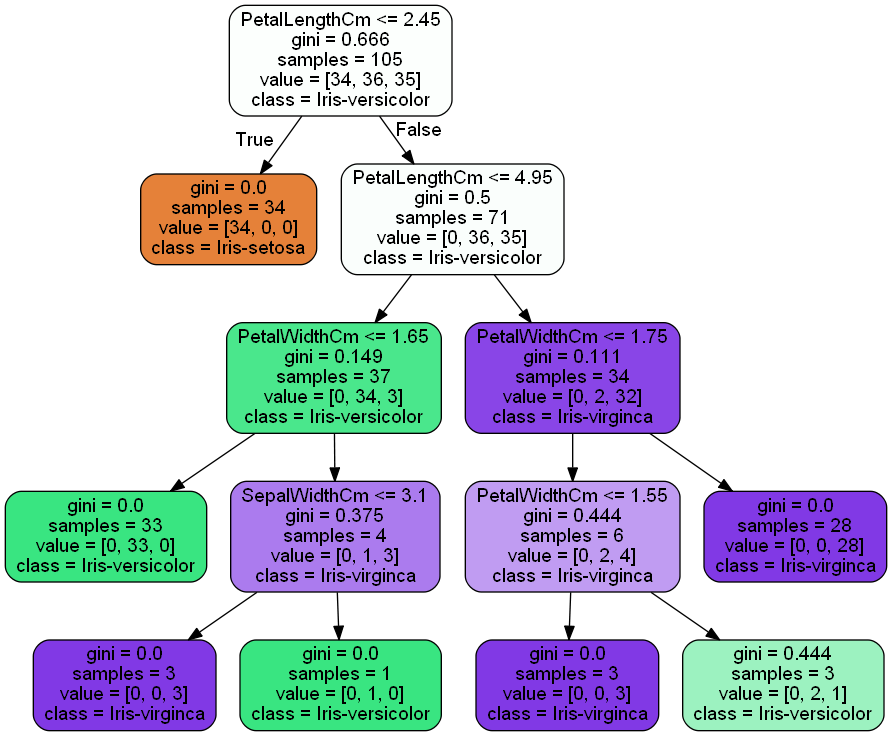

In [217]:
# plotting tree with max_depth=4
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=FN, 
                class_names=CN)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Evaluating Model Performance

In [218]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [219]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy Score",accuracy_score(y_train,y_train_pred))
print("------------------------------------------------------")
print("Confusion Matrix",confusion_matrix(y_train,y_train_pred))

Accuracy Score 0.9904761904761905
------------------------------------------------------
Confusion Matrix [[34  0  0]
 [ 0 36  0]
 [ 0  1 34]]


In [220]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy Score",accuracy_score(y_test,y_test_pred))
print("------------------------------------------------------")
print("Confusion Matrix",confusion_matrix(y_test,y_test_pred))

Accuracy Score 1.0
------------------------------------------------------
Confusion Matrix [[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## We achieved 100% Accuracy on test dataset , so we are not going to tune Hyperparameters